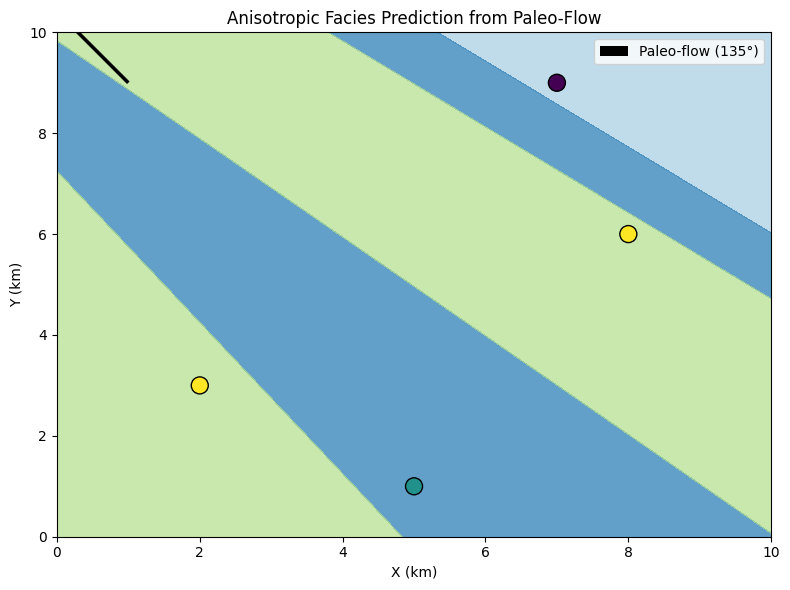

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define anisotropic distance function
def anisotropic_distance(x1, y1, x2, y2, theta, a1, a2):
    # Rotate points by -theta
    cos_t = np.cos(np.radians(-theta))
    sin_t = np.sin(np.radians(-theta))
    dx = x2 - x1
    dy = y2 - y1
    dx_rot = dx * cos_t - dy * sin_t
    dy_rot = dx * sin_t + dy * cos_t
    # Scale by ranges
    return np.sqrt((dx_rot / a1)**2 + (dy_rot / a2)**2)

# Simulate 4 wells
np.random.seed(2025)
well_x = np.array([2, 8, 5, 7])
well_y = np.array([3, 6, 1, 9])
facies = np.array([2, 2, 1, 0])  # 0=shale, 1=shaly sand, 2=clean sand

# Prediction grid
xg, yg = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))

# Paleo-flow parameters
theta = 135  # degrees
a1 = 4.0     # km (along flow)
a2 = 0.8     # km (across flow)

# Simple GP-like prediction: weighted average by anisotropic distance
facies_pred = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xi, yj = xg[i, j], yg[i, j]
        dists = np.array([anisotropic_distance(xi, yj, wx, wy, theta, a1, a2)
                         for wx, wy in zip(well_x, well_y)])
        # Avoid division by zero
        weights = np.exp(-dists**2 / 2.0)
        weights[dists == 0] = 1e10
        facies_pred[i, j] = np.average(facies, weights=weights)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xg, yg, facies_pred, levels=[-0.5, 0.5, 1.5, 2.5],
             colors=['#a6cee3', '#1f78b4', '#b2df8a'], alpha=0.7)
plt.scatter(well_x, well_y, c=facies, cmap='viridis', edgecolor='k', s=150)
plt.quiver(1, 9, np.cos(np.radians(theta)), np.sin(np.radians(theta)),
           scale=5, color='black', width=0.005, label=f'Paleo-flow ({theta}°)')
plt.xlabel('X (km)'); plt.ylabel('Y (km)')
plt.title('Anisotropic Facies Prediction from Paleo-Flow')
plt.legend()
plt.tight_layout()
plt.savefig('anisotropic_kernel_map.png', dpi=300, bbox_inches='tight')
plt.show()